# Práctica 1: Aprendizaje automático

__Fecha de entrega: 9 de marzo de 2022__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 2: Clasificación

__Número de grupo: 2__

__Nombres de los estudiantes: Alberto Almagro Sánchez, Juan Carlos Llamas Núñez y Enrique Rey Gisbert__

## 1) Carga del conjunto de datos

En este notebook trabajaremos con un conjunto de datos con características de móviles y trataremos de predecir su rango de precio. Las variables del conjunto de datos son las siguientes:

- `battery_power`: Total energy a battery can store in one time measured in mAh
- `blue`: Has bluetooth or not
- `clock_speed`: speed at which microprocessor executes instructions
- `dual_sim`: Has dual sim support or not
- `fc`: Front Camera mega pixels
- `four_g`: Has 4G or not
- `int_memory`: Internal Memory in Gigabytes
- `m_dep`: Mobile Depth in cm
- `mobile_wt`: Weight of mobile phone
- `n_cores`: Number of cores of processor
- `pc`: Primary Camera mega pixels
- `px_height`: Pixel Resolution Height
- `px_width`: Pixel Resolution Width
- `ram`: Random Access Memory in Mega Bytes
- `sc_h`: Screen Height of mobile in cm
- `sc_w`: Screen Width of mobile in cm
- `talk_time`: longest time that a single battery charge will last when you are
- `three_g`: Has 3G or not
- `touch_screen`: Has touch screen or not
- `wifi`: Has wifi or not
- `price_range`: This is the target variable with value of 0 (low cost), 1 (medium cost), 2 (high cost) and 3 (very high cost).

Crea un dataframe a partir del fichero `mobile_phones.csv` que se proporciona junto con la práctica.

__Nota__: existen otras variables que también son categóricas (como `blue`, `dual_sim`, etc.) pero como sólo pueden tomar dos valores (son booleanas), en nuestro caso no será problamático interpretarlas como números.

In [9]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [10]:
df = pd.read_csv('mobile_phones.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica cómo afecta tener o no clases equilibradas a la hora de entrenar y evaluar un modelo.

Calcula la correlación de las variables numéricas con la variable `price_range`. ¿Cuáles tienen mayor correlación con la variable de salida? ¿Qué conclusiones puedes extraer?

Comprueba los rangos y distribuciones de las 4 variables numéricas con mayor correlación con la variable `price_range`. Dibuja el diagrama de dispersión entre cada par de variables asignando un color diferente a los puntos que se corresponden con cada una de las 4 categorías a predecir. ¿Hay pares variables que separen bien las clases? 

A tenor de todo el análisis, ¿crees que va a ser un problema sencillo o complicado de resolver?

In [11]:
# ¿Equilibradas?
df['price_range'].value_counts() / df['price_range'].count() * 100

0    25.0
1    25.0
2    25.0
3    25.0
Name: price_range, dtype: float64

Claramente, los datos revelan que tenemos un número igual de elementos de cada clase, es decir, están equilibradas. Esto nos indica que tenemos datos de elementos de todas las clases en la misma cantidad, por lo que podremos realizar un entrenamiento que tenga en cuenta todas y cada una de ellas, sin sufrir de falta de información relevante. A su vez, a la hora de evaluar el modelo, podremos aplicar validación cruzada con menos riesgo de obtener resultados muy dispares según los subconjuntos que consideremos.

In [12]:
# Coeficientes de correlación entre la variable de salida price_range y el resto de variables numéricas
x = df.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)
todo_menos_price = ["blue", "battery_power","clock_speed","dual_sim","fc","four_g","int_memory","m_dep","mobile_wt","n_cores","pc","px_height","px_width","ram","sc_h","sc_w","talk_time","three_g","touch_screen","wifi"]
x.hide_columns(todo_menos_price)

,price_range
battery_power,0.2
blue,0.021
clock_speed,-0.0066
dual_sim,0.017
fc,0.022
four_g,0.015
int_memory,0.044
m_dep,0.00085
mobile_wt,-0.03
n_cores,0.0044


La tabla anterior muestra la correlación de la variable de salida price_range con el resto de variables numéricas que estamos considerando. Las variables con mayor coeficiente de correlación son ram, battery_power, px_height y px_width, por lo que deducimos que son las variables que más relación directa tienen con price_range. En concreto, la variable ram tiene coeficiente positivo de 0.92, que es considerablemente alto. Esto nos está adelantando que, por ejemplo cuando calculemos árboles de decisión, la variable ram (y las que tengan un mayor coeficiente de correlación) será la que probablemente esté cerca de la raíz, puesto que es la que hará que disminuya más la entropía con respecto a price_range.

In [13]:
# Media, desviación típica, minimo, maximo y percentiles de {ram, battery_power, px_height, px_width}
df.loc[:,["ram","battery_power","px_height","px_width"]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ram,2000.0,2124.2130,1084.732044,256.0,1207.50,2146.5,3064.50,3998.0
battery_power,2000.0,1238.5185,439.418206,501.0,851.75,1226.0,1615.25,1998.0
px_height,2000.0,645.1080,443.780811,0.0,282.75,564.0,947.25,1960.0
px_width,2000.0,1251.5155,432.199447,500.0,874.75,1247.0,1633.00,1998.0


In [14]:
from pandas.plotting import scatter_matrix
%matplotlib inline

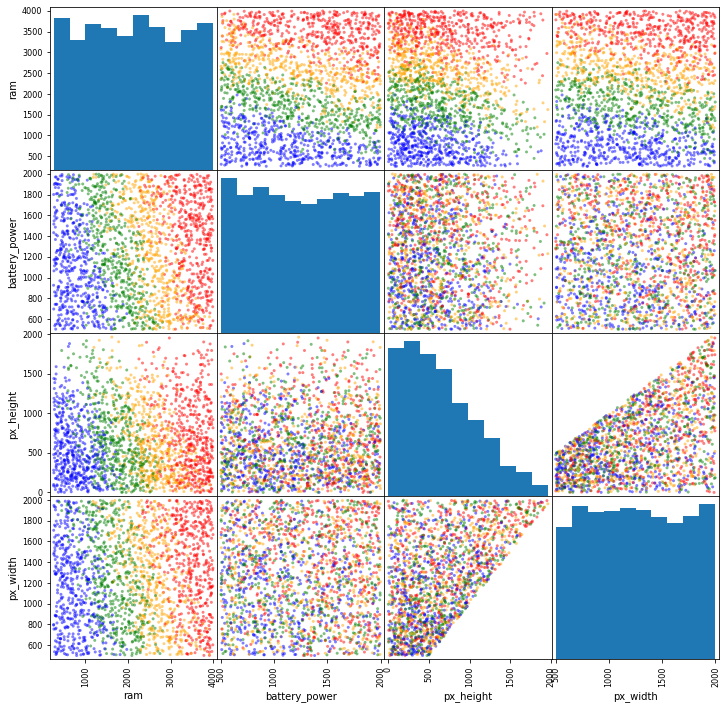

In [15]:
# Diagrama de dispersión para cada par de variables en {ram, battery_power, px_height, px_width}
dfn = df.loc[:, ["ram","battery_power","px_height","px_width"]]
dic_target = { 0 : 'low', 1: 'medium', 2: 'high', 3: 'very_high'}
dfn['price_range'] = df['price_range'].map(dic_target)

dic_colors = { 'low' : 'blue', 'medium' : 'green', 'high' : 'orange', 'very_high' : 'red' }
colors = dfn['price_range'].map(dic_colors)

scatter_matrix(dfn, figsize = (12, 12), diagonal = 'hist', color=colors)

# Instrucción inútil para que no se muestren datos irrelevantes por ser la anterior la última instrucción
dic_target = dic_target

Como ya adelantábamos antes, la variable ram parece separar bien las clases (que son los distintos colores de los puntos del diagrama de dispersión) cuando la emparejamos con battery_power, px_height o px_width. Sin embargo, en el resto de diagramas de dispersión no se aprecía claramente ningún tipo de patrón o separación entre las clases. 

En base a estas observaciones podemos hacernos una idea de que a priori puede ser un problema sencillo de resolver, puesto que  tenemos variables como ram o px_height con un coeficiente de correlación relativamente alto con la variable de salida price_range, y se aprecian con claridad en los diagramas de dispersión las distintas clases separadas. Además, tenemos variables como ram que tienen una desviación típica alta y muestras equilibradas respecto a la cantidad de datos en cada clase de price_range, por lo que cubren suficientemente el espacio de puntos posibles. Sin embargo, no tienen porque ser conclusiones indicativas de que el problema finalmente será sencillo de manera segura.

## 3) Normalizar los datos

Decide razonadamente si es necesario escalar o estandarizar los datos teniendo en cuenta que vamos a construir un árbol de decisión.

#### Decisión

Teniendo en cuenta que vamos a construir un árbol de decisión, no es necesario ni reescalar ni estandarizar los datos.

Esto se explica observando que la fórmula de la entropía, que es en lo que se basa el árbol para hacer las divisiones, solamente depende de las probabilidades de cada clase, que a su vez son completamente independientes de la escala de los datos.

In [16]:
datos_entrenamiento = df.loc[:,todo_menos_price].to_numpy()
datos_precio = df.loc[:,["price_range"]].to_numpy()

## 4) Optimizando el número mínimo de ejemplos para dividir un nodo

En este apartado vamos a entrenar nuestro clasificador e intentar dar con una parametrización que aprenda "lo justo", sin quedarse corto, ni sobreaprender.

Para ello, probaremos distintos árboles variando el número mínimo de ejemplos para dividir un nodo (parámetro `min_samples_split`) y usando validación cruzada en 10 partes. 

Pinta las curvas de apredizaje para distintos valores de dicho parámetro en entrenamiento y validación. Analiza e interpreta las curvas (¿qué puedes decir de cómo varía el comportamiento de clasificador en entrenamiento y validación a medida que cambia el valor del parámetro?) y decide de manera razonada qué valor del parámetro es el que consideras más adecuado.

Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable a predecir) y otro array que sólo contenga la variable a predecir. Usaremos __todas__ las variables del dataset para construir el árbol.

Vamos a realizar validación cruzada variando el número mínimo de elementos para dividir un nodo desde 2 (que es lo mínimo posible) hasta 100. 

Preferimos no probar con valores del parámetro mayores que 100, ya que 100 ya es un 5% de la población total, y consideramos que si en una hoja del árbol hay más de 100 individuos y son distinguibles, el árbol no va a ser propenso a generar buenos resultados.

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

train_accuracy = []
test_accuracy = []

RANDOM_STATE = 42

datos_precio = df.loc[:,["price_range"]].to_numpy()

# Entrenamos y validamos varios árboles con distintos números mínimos de ejemplos para dividir un nodo
max_samples = range(2, 100)
for mss in max_samples: 
    clf = DecisionTreeClassifier(criterion="entropy", min_samples_split=mss, random_state=RANDOM_STATE)
    scores = cross_validate(clf, datos_entrenamiento, datos_precio, scoring='accuracy', cv=10, return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))
    
train_accuracy, test_accuracy

([1.0,
  0.998,
  0.9948888888888889,
  0.9909444444444444,
  0.9870555555555555,
  0.9833888888888888,
  0.9794444444444446,
  0.9739444444444445,
  0.9695555555555556,
  0.9651111111111111,
  0.9609444444444444,
  0.9574444444444445,
  0.9543333333333335,
  0.9514444444444445,
  0.9476666666666667,
  0.9446111111111112,
  0.9413888888888889,
  0.9384444444444446,
  0.9367222222222221,
  0.9344444444444443,
  0.9324444444444444,
  0.9295000000000002,
  0.9283888888888889,
  0.9268888888888889,
  0.9252777777777779,
  0.9215,
  0.9204444444444444,
  0.9179444444444445,
  0.9162777777777779,
  0.9152222222222223,
  0.9143333333333334,
  0.913,
  0.9104444444444445,
  0.9088888888888889,
  0.9064444444444444,
  0.9041111111111111,
  0.9027777777777777,
  0.9024444444444445,
  0.9011666666666667,
  0.9001111111111111,
  0.899611111111111,
  0.8989999999999998,
  0.8977222222222222,
  0.8973888888888888,
  0.8966666666666665,
  0.895222222222222,
  0.8948888888888888,
  0.8946111111111111,

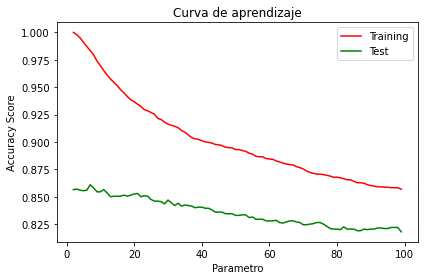

In [18]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(max_samples, train_accuracy, color="r",  label="Training")
plt.plot(max_samples, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

Como era de esperar, el accuracy sobre el conjunto de entrenamiento disminuye a medida que aumentamos el valor del parámetro, ya que juntamos cada vez los datos en grupos más grandes, que si bien pueden tener cosas en común, progresivamente tienden a una menor probabilidad de compartir clase (price_range en este caso). Esto confirma nuestra hipótesis de que un valor del parámetro de más del 5% de la población total no es demasiado bueno.

Sobre el conjunto de test, el patrón no está tan definido, alcanzándose un máximo para un valor del parámetro de 7. Es decir, nuestro árbol de decisión separará siempre que haya más de 7 elementos en un grupo y no sean todos de la misma clase (por lo que la entropía no será 0).

Sin embargo, es previsible que la profundidad del árbol que creemos con el valor del parámetro igual a 7 sea muy alta, ya que partimos de 2000 elementos, lo que hace que tengamos que dividir siempre que haya grupos con más elementos del 0,35% (y haya dos de clases diferentes) de los datos originales, lo que puede llegar a suponer muchas distinciones.

Aún así, consideramos este como el valor óptimo, por ser el que maximiza el accuracy sobre el conjunto de test.

## 5) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con el parámetro elegido en el apartado anterior y dibújalo (si es muy profundo dibuja solamente los primeros niveles). 

Obtén también la importancia de las variables, que es una agregación de su poder discriminante en los distintos nodos del árbol donde se usan (más info [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)) y píntala en una gráfica.

Con esos gráficos, contesta lo siguiente:

- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que has calculado es capaz de separar las clases? 
- Si no has mostrado el árbol completo, en la parte que estás viendo, ¿qué clases se separan mejor o peor? ¿qué variables ayudan a discriminarlas?
- ¿En cuál de los nodos del segundo nivel del árbol existe mayor confusión (siendo la raíz el nivel 0)?

__Nota__: al dibujar el árbol con la función `plot_tree` el parámetro `class_names` espera recibir una serie de datos de tipo cadena. Puedes convertir la serie de categorías a una serie de cadenas usando `mi_serie.astype('str')`.

El parámetro seleccionado en el apartado anterior ha sido min_samples_split = 7. Con este parámetro vamos a entrenar nuestro modelo con todos los datos que tenemos a nuestra disposición.

In [19]:
clf = DecisionTreeClassifier(criterion="entropy", min_samples_split=7, random_state=RANDOM_STATE)
clf = clf.fit(datos_entrenamiento, datos_precio)

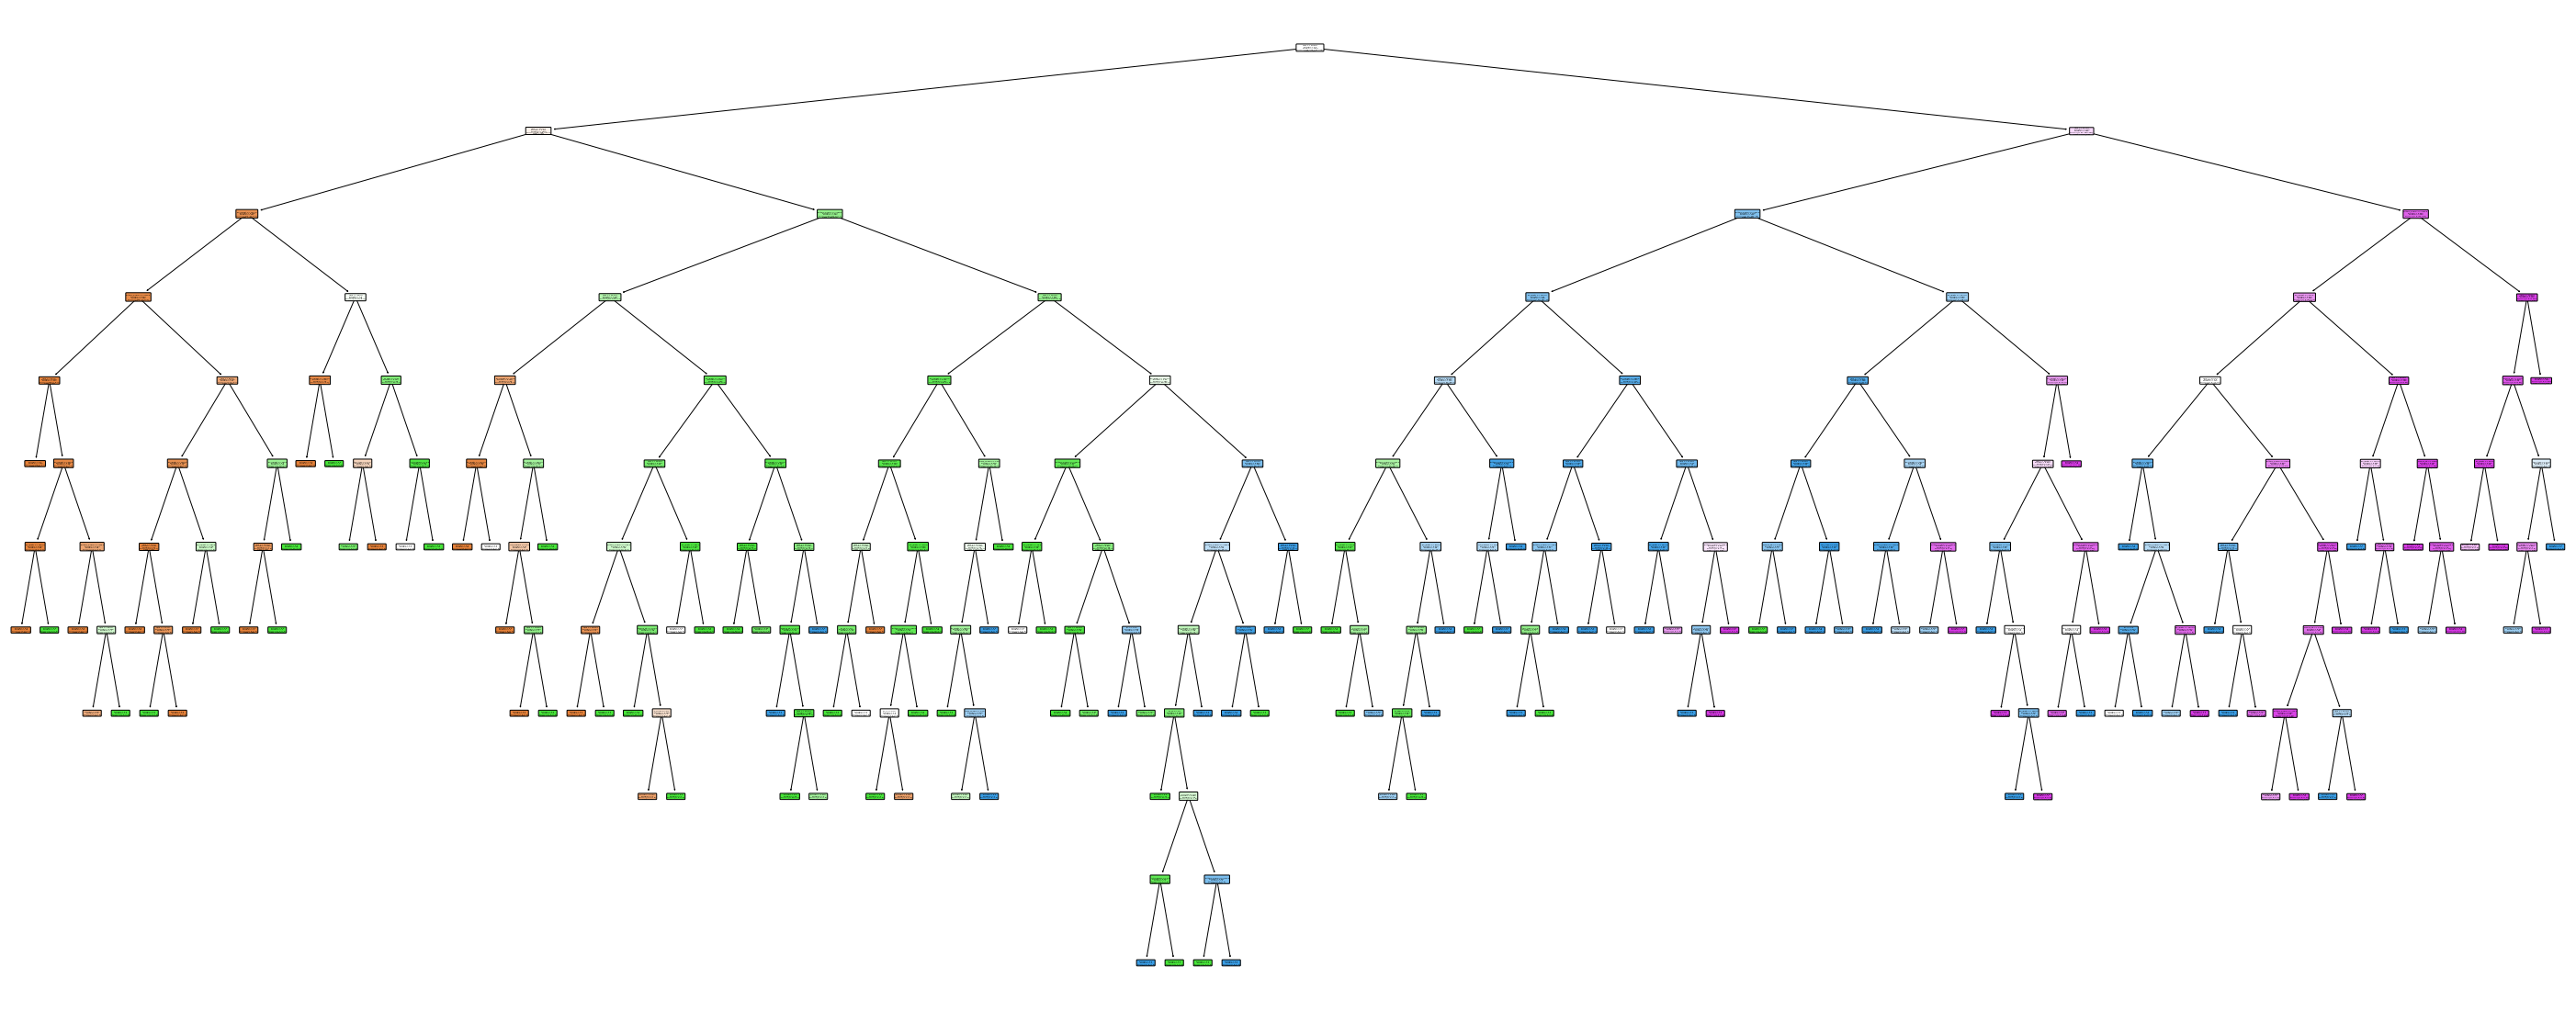

In [20]:
from sklearn.tree import plot_tree

# Pintamos el árbol
plt.figure(figsize=(50,20))
plot_tree(clf, feature_names=todo_menos_price, class_names=['low','medium','high','very_high'], filled=True, rounded=True)
plt.show()

El árbol de decisión generado es el que aparece en la figura superior. Debido a su difícil legibilidad vamos a mostrar únicamente los 3 primeros niveles, que nos serán suficientes para su análisis.

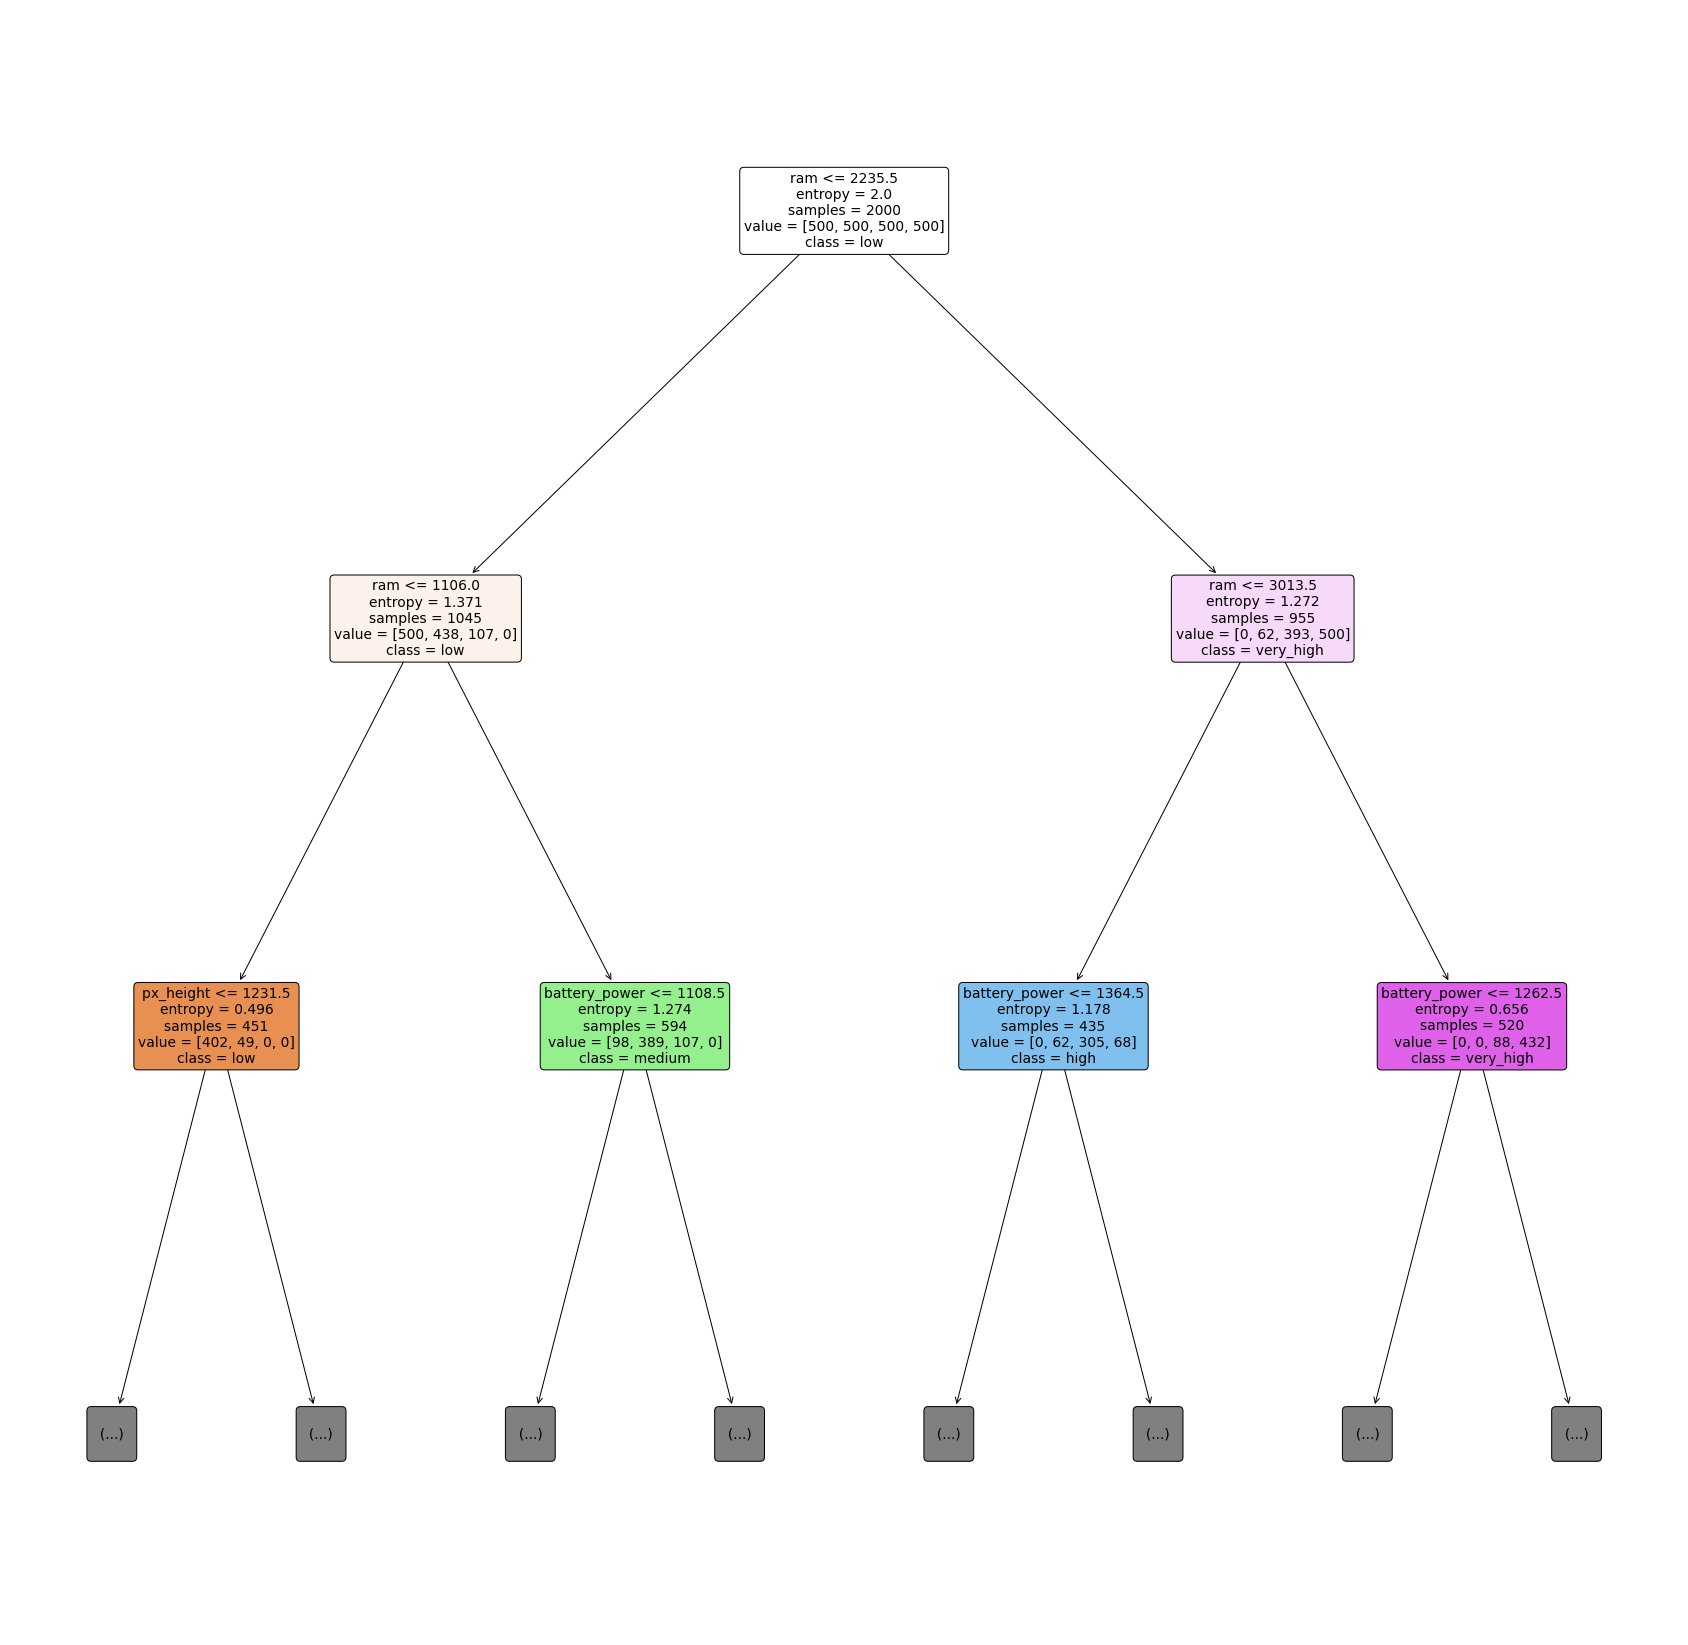

In [21]:
plt.figure(figsize=(30,30))
plot_tree(clf, feature_names=todo_menos_price, class_names=['low','medium','high','very_high'], max_depth=2,filled=True, rounded=True)
plt.show()

A continuación se muestra también la importancia de las variables, es decir, para cada variable (en el eje x) se representa su poder discriminante (normalizado) en los distintos nodos del árbol donde se usan.

        Variables  Importancia
0            blue     0.000000
1   battery_power     0.115235
2     clock_speed     0.004166
3        dual_sim     0.001125
4              fc     0.000000
5          four_g     0.000000
6      int_memory     0.007748
7           m_dep     0.003512
8       mobile_wt     0.010819
9         n_cores     0.005664
10             pc     0.004750
11      px_height     0.063722
12       px_width     0.081925
13            ram     0.690453
14           sc_h     0.001125
15           sc_w     0.002797
16      talk_time     0.006958
17        three_g     0.000000
18   touch_screen     0.000000
19           wifi     0.000000


<AxesSubplot:xlabel='Variables'>

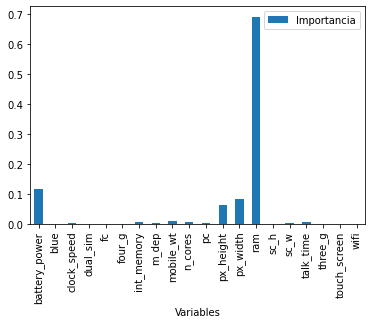

In [30]:
aux=pd.DataFrame(todo_menos_price,columns=['Variables'])
aux['Importancia']=clf.feature_importances_
print(aux)
aux.groupby('Variables').mean('Importancia').plot.bar()

Observando la gráfica de la importancia de las variables y el árbol de decisión podemos extraer una serie de conclusiones.

La primera de ellas está en relación con la importancia de cada una de las variables. Sabemos que las variables más discriminantes son aquellas que aparecen en los niveles superiores del árbol de decisión. Las dos primeras preguntas que se hacen, independientemente de la rama, son sobre el valor de la varible ram, por lo que deducimos que esta tiene una gran importancia. Esta conclusión se corrobora al observar la gráfica de la importancia, ya que su valor normalizado de importancia es aproximadamente de 0.7, muy destacado respecto a las demás. Además, este resultado tiene sentido ya que, según habíamos advertido previamente, la varible ram era aquella con un mayor coeficiente de correlación con la variable price_range y que separaba particularmente bien las clases. Observando los siguientes niveles del árbol podemos ver como las variables battery_power y px_height son aquellas más relevantes a la hora de clasificar para los nodos internos. Nuevamente, recordamos que estas variables tenían un coeficiente de correlación destacado frente al resto y eran candidatas a separar bien entre las clases. Además la gráfica de la importancia también les otorga un peso notable. Aunque no aparece en los tres primeros niveles, otra variable relevante es px_width ya que aparece en la gráfica de importancia. Recordamos que estas eran las 4 variables más correlacionadas con price_range.

En segundo lugar estamos interesados en saber si alguna de las variables de nuestros datos no se ha utilizado para discriminar. Observando el gráfico de importancia, se puede apreciar a simple vista que las variables blue, dual_sim, fc, four_g, sc_h, three_g, touch_screen y wifi no discriminan bien ya que su importancia es 0 o un valor suficientemente cercano a 0 como para considerarlo despreciable (realmente aquellas que no se utilizan para discriminar son concretamente todas las anteriores salvo dual_sim y sc_h, que sí se utilizan pero tienen un importancia muy baja).

Si únicamente hicieramos una pregunta podemos calcular el accuracy observando los datos de los dos nodos del segundo nivel. Para el hijo izquierdo se tiene que hay 1045 individuos, de los cuales 500 pertenecen a la clase mayoritaria (low). Para el nodo derecho, hay 955 individuos, de los cuales 500 pertenecen a la clase mayoritaria (very_high). Por tanto, la clase observada es la clase pronosticada en 500+500 de los 2000 casos, es decir, el accuracy es de 0.5.

Para saber si el árbol construido consigue separar todas las clases hay que mirar si las hojas tienen individuos de una sola clase o de varias. Recorriendo las hojas, podemos ver que en alguna de ellas hay individuos de más de una clase con lo que el árbol no separa todas las clases. Esto se debe a que hemos fijado el parámetro min_samples_split a 7, es decir, 7 es el número mínimo de individuos que debe tener un nodo para dividirse y en el árbol hay nodos de 6 o menos individuos de clases distintas. La separación no es perfecta sobre los datos de entrenamiento (no hemos buscado que lo sea porque sería demasiado específica y sobreaprendería), pero veremos en el próximo apartado "como de bien" separa las clases el árbol.

Según la parte del árbol mostrada las clases que mejor se separan son aquellas que intuitivamente están en extremos opuestos, es decir, low y very_high. La primera pregunta sobre la variable ram ya consigue descartar una de las dos etiquetas. De manera similar, la clase low se distigue razonablemente bien de la clase high tras hacer dos preguntas y la clase medium con very_high de forma análoga. Las más difíciles de distinguir entre sí son medium con low y high y high con medium y very high. Como hemos comentado anteriormente, las variables que mejor clasifican son ram, battery_power, px_height y px_width.

El nodo del segundo nivel donde hay más confusión es el hijo derecho del hijo izquierdo de la raiz (el verde). Para ello podemos calcular la tasa de acierto de cada nodo. Así de izquierda a derecha son:  (naranja) 402/451=0.89, (verde) 389/594=0.65, (azul) 305/435= 0.70 y (rosa) 432/520=0.83. El valor más bajo es como decimos el del nodo verde y es aquel en el que peor separadas están las clases. También es aquel con una mayor entropía, es decir, aquel más heterogeneo y por tanto confuso.

## 6) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en una empresa real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

Empezamos obteniendo la profundidad óptima del árbol de decisión con el parámetro anterior min_samples_split = 7. Para ello, utilizamos de nuevo validación cruzada probando distintos valores de la profundidad máxima max_depth.

In [31]:
train_accuracy = []
test_accuracy = []

# Entrenamos y validamos varios árboles con distintas profundidades máximas (para min_samples_split = 7)
max_depths = range(1, 15)
for md in max_depths: 
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=7, random_state=RANDOM_STATE)
    scores = cross_validate(clf, datos_entrenamiento, datos_precio, scoring='accuracy', cv=10, return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))
    
train_accuracy, test_accuracy

([0.5,
  0.7638333333333334,
  0.7649999999999999,
  0.8155555555555555,
  0.8753333333333334,
  0.913111111111111,
  0.9491111111111111,
  0.9722777777777777,
  0.9807777777777776,
  0.9828888888888889,
  0.9833333333333332,
  0.9833888888888888,
  0.9833888888888888,
  0.9833888888888888],
 [0.5,
  0.758,
  0.756,
  0.7830000000000001,
  0.834,
  0.8494999999999999,
  0.8525,
  0.8545,
  0.8574999999999999,
  0.8605,
  0.8620000000000001,
  0.861,
  0.861,
  0.861])

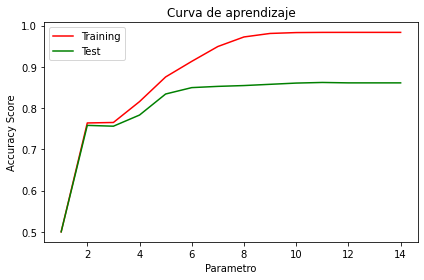

In [32]:
# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()  

Para max_depth = 6 obtenemos el mejor valor de exactitud para el conjunto de test. A partir de esa profundidad la métrica mejora  mucho más para el conjunto de entrenamiento que para el conjunto de test indicando que el clasificador está empezando a sobre-entrenar y generaliza peor. En lo que sigue, utilizaremos este valor de max_depth = 6.


In [33]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [34]:
# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Construimos el clasificador
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6, min_samples_split=7, random_state=RANDOM_STATE)

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(clf, datos_entrenamiento, datos_precio, scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8524833142569863
Exhaustividad ponderada media:  0.8494999999999999
F1 ponderado media:  0.8498910786436227


Continuamos ahora obteniendo un informe detallado de cada clase, y dibujando la matriz de confusión.

In [35]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

In [36]:
# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6, min_samples_split=7, random_state=RANDOM_STATE)
predictions = cross_val_predict(clf,  datos_entrenamiento, datos_precio, cv=10)

# Informe por clases
cr = classification_report(datos_precio,predictions, target_names=['low','medium','high','very_high'])
print(cr)

              precision    recall  f1-score   support

         low       0.91      0.92      0.92       500
      medium       0.83      0.80      0.81       500
        high       0.76      0.82      0.79       500
   very_high       0.90      0.86      0.88       500

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



Los resultados que obtenemos para la precisión ponderada media, la exhaustividad ponderada media y F1 ponderado media son notablemente altos, rondando el 85%, lo cual nos indica que nuestro clasificador es considerablemente bueno.

Además, podemos observar que los resultados son claramente mejores para las clases low y very_high. Dado que hay exactamente la misma cantidad de datos de cada una de las clases, de nuevo la explicación a esto es que es más fácil distinguir objetos (móviles en este caso) posicionados en los extremos que aquellos a mitad, ya que un móvil con características muy bajas solamente puede ser de gama baja, mientras que uno con características medias puede ser tanto de gama media como de gama alta, lo que conduce a que haya errores en las predicciones. Por tanto, es lógico que las métricas den mejores resultados para estas dos clases que para las dos intermedias.

In [37]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[461  39   0   0]
 [ 43 398  59   0]
 [  0  41 410  49]
 [  0   0  70 430]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

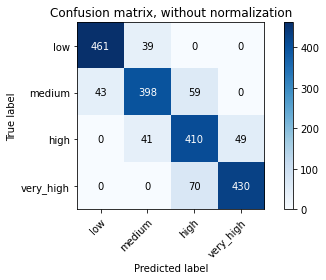

In [38]:
# El parámetro normalize permite mostrar los porcentajes en lugar del número de instancias
plot_confusion_matrix(datos_precio, predictions, ['low','medium','high','very_high'], normalize=False)

Gracias a la matriz de confusión, podemos extraer multitud de conclusiones relevantes acerca de nuestro clasificador basado en árboles de decisión. 

En primer lugar, teniendo en cuenta que estamos clasificando móviles según su rango de precio, podemos ver claramente plasmado en la matriz cómo nuestro clasificador tiene un buen rendimiento, puesto que, como ya comentamos anteriormente, tiene valores de más de 0.8 en precisión y exhaustividad medias, lo cual se ve por los valores altos en proporción al resto en los cuadrados oscuros de la diagonal. Sin embargo, siempre hay que tener en cuenta para qué usamos nuestro clasificador, puesto que en otras áreas unos datos de precisión, exhaustividad y F1 como los que hemos obtenido pueden ser muy malos, debido a que una precisión de 0.85 puede ser insuficiente.

En segundo lugar, observamos como nuestro clasificador, en base a los datos aportados, no confunde nunca móviles con otras clases separadas a distancia mayor que 1, es decir, no se equivoca al clasificar móviles de clase low con las clases high y very_high, ni tampoco móviles de clase high en clase low, etc... Esto nos asegura a priori (respecto a nuestros datos iniciales) que en caso de confundirse de clase, nuestro clasificador lo hará con clases colindantes.

En tercer lugar, de nuevo vemos que nuestro clasificador es mejor al clasificar los móviles de las clases de los extremos low y very_high, puesto que tienen mayor valor en sus cuadrados de la diagonal, solo confundiéndose con las clases medium y high respectivamente. 

En conclusión, este clasificador basado en árboles de decisión con los parámetros de max_depth = 6 y min_samples_split = 7  tiene un rendimiento notable en su contexto (pero mejorable), y puede ayudarnos de forma efectiva a clasificar tipos de móviles según su rango de precio codificado en low, medium, high y very_high. Además, puede ser muy útil en la empresa o en diversos ámbitos de estudio, puesto que al estar basado en árboles de decisión es muy sencillo que un experto en la materia pueda entender el proceso de clasificación que se ha llevado a cabo, e incluso corregirlo según las preferencias que se tengan. Respecto a sus desventajas, el algoritmo de clasificacion usando árboles de decisión suele ser más costoso que otros algoritmos, y el tiempo de entrenamiento suele ser algo alto. Además, la estructura del árbol resultante es muy inestable respecto a variaciones en los datos de entrenamiento, por lo que bajo otros datasets el árbol puede ser muy distinto. Por último, la clasificación por árboles de decisión es inadecuada para aplicar regresión y predecir variables continuas, por lo que estamos forzados a que la variable que estamos prediciendo, price_range, tome un número fijo y finito de valores.

## 7) Usando el clasificador k-NN 
Intenta resolver el mismo problema usando un clasificador k-NN. Para ello, elige las variables que consideres más relevantes para el problema, basándote principalmente en el estudio que has hecho del mismo en los apartados anteriores (o alguno adicional que hagas aquí si lo consideras adecuado). Tendrás que decidir, si escalas las variables o no, y qué valor de k consideras el más adecuado.

Analiza los resultados obtenidos y di por qué crees que suceden.


En primer lugar, las variables más adecuadas para clasificar las clases han demostrado ser ram, battery_power, px_height y px_width. Estas variables (en general todas) son numéricas pero tienen una escala muy diferente por lo que para usar k-NN  es conveniente escalar los datos. Vimos en los primeros apartados que la distribución de las 4 variables más relevantes no se asemejaba a una distribución normal por lo que pensamos que tiene más sentido escalar que estandarizar. 

In [39]:
import sklearn.preprocessing as skp

# elegimos entre estandarizar o reescalar los datos
transformer = skp.MinMaxScaler()

# transform data
X = transformer.fit_transform(df.loc[:, ['ram', 'battery_power', 'px_height', 'px_width']].to_numpy())

# creamos una lista para poder saber qué representa cada columna
labels = ['ram', 'battery_power', 'px_height', 'px_width']

print(X)

[[0.61277392 0.22778891 0.01020408 0.17089453]
 [0.63468733 0.34736139 0.46173469 0.99332443]
 [0.6272047  0.04141617 0.64438776 0.811749  ]
 ...
 [0.7485302  0.94188377 0.44285714 0.75567423]
 [0.16381614 0.6753507  0.17142857 0.11348465]
 [0.9788883  0.00601202 0.24642857 0.16955941]]


Con objetivo de fijar la notación y evitar errores vamos a llamar k (minúscula) a la k del k-NN y K (mayúscula) a la K de la validación cruzada. En principio el valor de K lo vamos a fijar a un valor constante K=10. Para seleccionar el valor óptimo de k en un cierto conjunto (en nuestro caso k se mueve de 1 a 199), fijamos k a cada uno de los posibles valores que puede tomar y utilizamos validación cruzada con K iteraciones. Calcularemos el accuracy para las K iteraciones y con ello obtendremos la media y la desviación típica de este acuracy (para cada k). Representaremos estos valores en una gráfica y después los interpretaremos.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Medias y desviaciones típicas de accuracy para distintos valores de k
accuracy_mean = []
accuracy_std = []

k_values = range(1,200)
for k in k_values: 
    # Entrenar y validar
    clf = KNeighborsClassifier(k, weights='distance')
    scores = cross_validate(clf, X, df["price_range"], scoring='accuracy', cv=10)
    
    accuracy_mean.append(np.mean(scores['test_score']))
    accuracy_std.append(np.std(scores['test_score']))
    
accuracy_mean

[0.8795,
 0.8795,
 0.8960000000000001,
 0.8975,
 0.9005000000000001,
 0.8985,
 0.9029999999999999,
 0.9094999999999999,
 0.9020000000000001,
 0.9015000000000001,
 0.9075,
 0.9135,
 0.9110000000000001,
 0.9125000000000002,
 0.9145,
 0.9155000000000001,
 0.915,
 0.9145,
 0.9145,
 0.9174999999999999,
 0.9174999999999999,
 0.9155,
 0.9155000000000001,
 0.9125,
 0.914,
 0.9115,
 0.9125,
 0.9125,
 0.9095000000000001,
 0.9099999999999999,
 0.9115000000000002,
 0.9145,
 0.9125,
 0.9135,
 0.9155000000000001,
 0.914,
 0.9155000000000001,
 0.915,
 0.9155000000000001,
 0.9145,
 0.9175000000000001,
 0.9175000000000001,
 0.916,
 0.915,
 0.9155000000000001,
 0.9165000000000003,
 0.9189999999999999,
 0.9199999999999999,
 0.9179999999999999,
 0.9195,
 0.9175000000000001,
 0.9164999999999999,
 0.9129999999999999,
 0.916,
 0.9164999999999999,
 0.914,
 0.9164999999999999,
 0.9165000000000001,
 0.915,
 0.9180000000000001,
 0.916,
 0.9189999999999999,
 0.9194999999999999,
 0.9164999999999999,
 0.91650000000

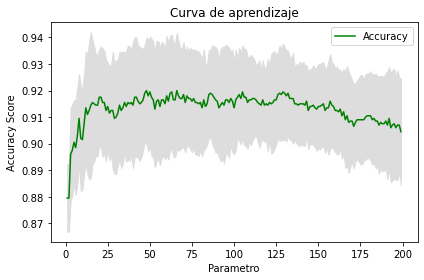

Maximo: 0.9199999999999999
Valor del parámetro para el que se alcanza el máximo: 47
Desviación típica del accuracy para este parámetro: 0.019999999999999983


In [41]:
# Dibujamos la línea con la accuracy (exactitud) en el test
plt.plot(k_values, accuracy_mean, color="g", label="Accuracy")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(accuracy_mean) - np.array(accuracy_std)
upper_limit = np.array(accuracy_mean) + np.array(accuracy_std)
plt.fill_between(k_values, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()
print('Maximo:', accuracy_mean[np.argmax(accuracy_mean)])
print('Valor del parámetro para el que se alcanza el máximo:',np.argmax(accuracy_mean))
print('Desviación típica del accuracy para este parámetro:',accuracy_std[np.argmax(accuracy_mean)])

Obtenemos por tanto el valor máximo de k para k = 47, por lo que vamos a ver qué tal se comporta con respecto a diferentes métricas.

In [42]:
K_OPTIMO = 47

target_knn = []
for i in range(len(datos_precio)):
    target_knn.append(datos_precio[i][0])
data_scaled_knn = X

clf_knn = KNeighborsClassifier(K_OPTIMO, weights='distance')

scores_knn = cross_validate(clf_knn, data_scaled_knn, target_knn, scoring=scoring_metrics, cv=10, return_train_score=False)

scores_knn

{'fit_time': array([0.00299263, 0.00199437, 0.00099826, 0.00199175, 0.00199819,
        0.00199246, 0.00099277, 0.00101924, 0.00099683, 0.00199389]),
 'score_time': array([0.004987  , 0.00502205, 0.00598741, 0.00498509, 0.00498486,
        0.00498652, 0.00499201, 0.00498676, 0.004987  , 0.00307775]),
 'test_precision_weighted': array([0.90470635, 0.96566719, 0.91322226, 0.92109372, 0.91127202,
        0.9233631 , 0.93094551, 0.92048887, 0.89853098, 0.92215781]),
 'test_recall_weighted': array([0.9  , 0.965, 0.91 , 0.92 , 0.91 , 0.92 , 0.93 , 0.92 , 0.895,
        0.92 ]),
 'test_f1_weighted': array([0.90001135, 0.96519311, 0.91044849, 0.92011994, 0.91016712,
        0.92067771, 0.93028611, 0.91977172, 0.89550136, 0.92033654])}

In [43]:
print('Precisión ponderada media: ',np.mean(scores_knn['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores_knn['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores_knn['test_f1_weighted']))

Precisión ponderada media:  0.9211447813649245
Exhaustividad ponderada media:  0.9189999999999999
F1 ponderado media:  0.9192513439523335


Ahora podemos calcular la exactitud, exahustividad y medida F1 de cada una de las clases por separado.

In [44]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

predictions_knn = cross_val_predict(clf_knn, data_scaled_knn, target_knn, cv=10)

# Informe por clases
cr = classification_report(target_knn, predictions, target_names = ['low','medium','high','very_high'])
print(cr)

              precision    recall  f1-score   support

         low       0.91      0.92      0.92       500
      medium       0.83      0.80      0.81       500
        high       0.76      0.82      0.79       500
   very_high       0.90      0.86      0.88       500

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



El clasficador k-NN nos ha ofrecido unos resultados muy buenos, notablemente mejores que los obtenidos mediante árboles de decisión. A pesar de su simpleza, la elección de las 4 variables relevantes para el problema ha demostrado ser clave en el clasificador k-NN frente al árbol de decisión, que tiene la ventaja de discriminar por él mismo las variables relevantes a costa de obtener peores resultados.